# Case Study: Lending Club
**********************************************
### The Analysis Framework and Approach:
1. Data understanding
    - Import the dataset
    - Review the data -- dataset head
    - Review the columns
    - Shortlist variables of interest
2. Data cleaning
    - cleaning missing values
    - removing redundant columns
3. Data Analysis 
4. Recommendations


<br>
<br>
<b>Syed Towhid & Sujay N</b> <br>
iiitB and upGrad Executive PG Programme<br>
Machine Learning & Artificial Intelligence <br>

In [118]:
#Importing required libraries to work with Datasets, math work and some plots.
#This will be our libraries section in the codebase.
# we may need to install plotly on any system which does not have it.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import re #added as reference here for using regular expression below

### Section-1: Data Understanding
`Scope the target dataset to build an understanding`

In [119]:
#Let us import the load dataset and have a first hand look at metadata

loan = pd.read_csv("C:\\Users\\Admin\\Lending_Club_Case_Study\\loan.csv", sep=",")

loan.info()
loan.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


(39717, 111)

In [120]:
#Let's look at the first few rows here, the head of the dataset.
#This is always a good head start to get a glimpse of the data.

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [121]:
# Looking at all the column names here, the important ones which could be potentail indicators must be shortlised.

loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning

`It is important to identify and eliminate any rows or columns which are non value add to our analysis`

### Columns Assessment

In [122]:
# Missing values either in rows or columns are common with any data.
# Let's first fix the missing values and then check for other types of data quality problems.
# Paramater axis defaults to columns i.e., axis=0, mentioning here to remember.

loan.isnull().sum(axis=0)


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [123]:
# Above we can see that missing or null values are ranging from 0 to 39717, indicating many columns which are fully blank.
# Let us find the missing values percentage per column for a quick assessment.

(round(loan.isnull().sum(axis=0)/len(loan.index),2) * 100)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [124]:
# Columns with high % of missing values add no value to analysis, we see 54 column which are 100% missing.
# The other higher missing value % are 33%, 65%. 93% and 97% and these columns do not inluence our analysis.
# 54 of 111 columns are 100% Blanks except header value in loan dataset (48% of load dataset strructure is not useful).

(round(loan.isnull().sum(axis=0)/len(loan.index),2) * 100).value_counts().sort_index(ascending=True)

0.0      50
2.0       1
3.0       1
6.0       1
33.0      1
65.0      1
93.0      1
97.0      1
100.0    54
dtype: int64

In [125]:
# Columns with more than 90% missing values do not contribute positively to analysis.
# Keeping 90% initial baseline for missing values, let's identify those columns here.
# 56 of 111 columns are not qualified per our initial baseline (50% of loan Dataset is not useful)

missing_val_cols = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_val_cols)


# Count of columns per baseline, keep below validation line commented.
#sum(missing_val_cols.value_counts())

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [126]:
# loan dataset shape before column drop - (39717, 111)
# loan dataset shape after  column drop - (39717, 55)
# we see 49.54% drop in loan dataset strucutre.

loan = loan.drop(missing_val_cols, axis=1)
loan.shape

(39717, 55)

In [127]:
# Relook at the missing values after dropping columns
# There are two high % here, [desc-32%] and [mths_since_last_delinq - 64%] within this subset.
# Though these two columns do not violate out initial missing values baseline 90%, let's study them further.
# These are currently appearing to be the outliers within the subset.

round(100*(loan.isnull().sum()/len(loan.index)),2).sort_values()

id                             0.00
earliest_cr_line               0.00
open_acc                       0.00
pub_rec                        0.00
revol_bal                      0.00
total_acc                      0.00
initial_list_status            0.00
out_prncp                      0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
delinq_2yrs                    0.00
total_pymnt_inv                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
collection_recovery_fee        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                    0.00
total_rec_prncp                0.00
dti                            0.00
inq_last_6mths                 0.00
zip_code                       0.00
installment                    0.00
grade                          0.00
sub_grade                   

In [128]:
#Let us now take a step futher to study the 32 and 64 percent columns

loan.loc[:,['desc','mths_since_last_delinq']].head()


,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


<b>desc</b> - contains appplicant comments while applying for loan. We are not using NLP concept here, lets drop this.<br>
<b>mths_since_last_delinq:</b> Thsi inforation is generated after loan approval. As we are looking for pre-loan approval factor to decide acceptance or rejction, this column is of no use for us, let's drop it.

In [129]:
# Since the information in two columns will not be in scope for our analysis, let's drop them.
# As the load dataset is modified at this stage, re-executing this line of code independently, will generate warning.
# Because these columns are dropped from parent dataset and we will attempt to drop column which does not exist at
# this stage of programming. We have to run atleast the read statement once.
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [130]:
# Now, let's relook at the trimmed loan dataset for missing values percentages.
# There are couple of other columns with missing values (low %), in  this subset
# We can impute those columns, but we are not doing modelling here so can ignore them.
round(100*(loan.isnull().sum()/len(loan.index)),2).sort_values()

id                            0.00
earliest_cr_line              0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
total_acc                     0.00
initial_list_status           0.00
out_prncp                     0.00
out_prncp_inv                 0.00
total_pymnt                   0.00
delinq_2yrs                   0.00
total_pymnt_inv               0.00
total_rec_int                 0.00
total_rec_late_fee            0.00
recoveries                    0.00
collection_recovery_fee       0.00
last_pymnt_amnt               0.00
policy_code                   0.00
application_type              0.00
acc_now_delinq                0.00
delinq_amnt                   0.00
total_rec_prncp               0.00
dti                           0.00
inq_last_6mths                0.00
zip_code                      0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv     

### Rows Assessment

In [131]:
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [132]:
# Let's see an aggregated view of the missing values count row wise.
# Loan datasets shape at this stage is (39717,53).
# maximum missing value is 5 across 7 rows, data looks clean.

loan.isnull().sum(axis=1).value_counts()

0    36431
1     2168
2     1054
4       34
3       23
5        7
dtype: int64

In [133]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [134]:
# There are important columns for analysis ahead whcih have psuedo infomration such as int_rate (number and %)
# We need to identify such columns and transform the information to be meaninful.

loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))

In [135]:
# Antoher such hcolumn is Employement Lenghth, contains numeric and characters - hybrid values.
# We need to extract the numeric part from the variable employment length here.
# Let's drop the missing values from the column as we are not imputing here.
# Also, missing values will intefere in following analysis (otherwise the regex code below throws error)

loan = loan[~loan['emp_length'].isnull()]

In [136]:
# using regular expression to extract numeric values from the string
import re

loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

In [137]:
# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [138]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

## Data Analysis

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan.<br> Now, there are broadly three types of variables - 
1. `Applicant` associated variables [demographic variables such as age, occupation, employment details etc.]
2. `Loan characteristics` variables [amount of loan, interest rate, purpose of loan etc.]
3. `Customer Behaviour` variables [generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.]

The customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.<BR>Thus, going forward, we will use only the other two types of variables.

### Potential indicators of defaulter category among loan applicants.
`54 of 111 columns are 100% Blanks except header value in loan dataset.` <BR>
`48% of loan dataset is non-value add to analysis as it is blank columns`<BR>
`From 52% of data is loan dataset with varied blank % and following columns are shortlisted`

1. loan_amount
2. term
3. interest rate
4. grade
5. sub grade
6. annual income
7. purpose of the loan
8. Emp_length
9. Loan_date(Month)
10.Home_ownership
11.Verification_status



The target variable, which we want to compare across the independent variables, is loan status. The strategy is to figure out compare the average default rates across various independent variables and identify the ones that affect default rate the most.

In [139]:
# Let us remove all the Demographic and Customer Behavioural features which is of no use for default analysis for credit approval.

cols_to_drop = ['id', 'member_id','url','title','addr_state','zip_code',"delinq_2yrs","earliest_cr_line", "inq_last_6mths", 
                "open_acc", "pub_rec", "revol_bal","total_acc","out_prncp","out_prncp_inv","total_pymnt",
                "total_pymnt_inv","total_rec_prncp", "total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
                 "last_pymnt_d", "last_pymnt_amnt","last_credit_pull_d","application_type"]

loan = loan.drop(cols_to_drop, axis=1)
print("Features we are left with",list(loan.columns))



Features we are left with ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'revol_util', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


In [140]:
loan.shape

(38642, 27)

In [141]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38642 non-null  int64  
 1   funded_amnt                 38642 non-null  int64  
 2   funded_amnt_inv             38642 non-null  float64
 3   term                        38642 non-null  object 
 4   int_rate                    38642 non-null  float64
 5   installment                 38642 non-null  float64
 6   grade                       38642 non-null  object 
 7   sub_grade                   38642 non-null  object 
 8   emp_title                   37202 non-null  object 
 9   emp_length                  38642 non-null  int64  
 10  home_ownership              38642 non-null  object 
 11  annual_inc                  38642 non-null  float64
 12  verification_status         38642 non-null  object 
 13  issue_d                     386

In [142]:
# The cleaned dataset now looks ready for analysis, given the % of missing values is minimal.
# emp_title will NOT impact or be used in our analysis -  3.73% missing value can be ignored.
# The variables remaining are largely loan applicant and Loan Characteristics to work with.
# Raw dataset shape -(39717,111) and Curated dataset shape (38642,28)


round(loan.isnull().sum()/len(loan.index)*100,2)

loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     3.73
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
purpose                       0.00
dti                           0.00
revol_util                    0.12
initial_list_status           0.00
collections_12_mths_ex_med    0.14
policy_code                   0.00
acc_now_delinq                0.00
chargeoff_within_12_mths      0.14
delinq_amnt                   0.00
pub_rec_bankruptcies          1.80
tax_liens                     0.10
dtype: float64

In [143]:
# Our Target column in loan_Status, let have a deeper assessment of this column.
loan.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [144]:
# There are 3 uniques values in loan status columns.
# The laons which are current does not give us indicator for prediction as that event is in future.
# Let's exclude the current loans from the subset.

In [145]:
loan.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [146]:
loan['loan_status'] = loan['loan_status'].astype('category')
loan.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

###  Removing records with loan status as “Current”, as the loan is currently running and we can’t infer any information regarding default from such loans and coverting loan status to a numerical equivalent.

In [147]:
# There are 3 uniques values in loan status columns.
# The laons which are current does not give us indicator for prediction as that event is in future.
# Let's exclude the current loans from the subset.
# Also making a copy of laon into ana_loan for analysis

loan = loan[loan['loan_status'] != 'Current']

In [148]:
ana_loan = loan

In [149]:
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [150]:
# Loan status contained non-numeric values, after tranformiing them to either 1 or 0, converitng the columns to numeric.
# Loan status contained non-numeric values, after transforming them to either 1 or 0, converting the columns to numeric .
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))

### Metrics Derivation
Issue date is not in the standard format also we can split the date into two columns with month and the year which will make it easy for analysis
Year in the datetime requires year between 00 to 99 and in some cases year is single digit number i.e. 9 writing a function which will convert such dates to avoid exception in date conversion.

In [151]:
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [152]:
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)

In [153]:
loan.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [154]:
loan.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

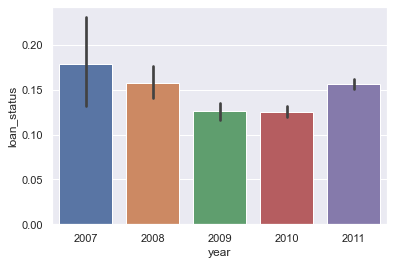

In [155]:
sns.barplot(x='year',y='loan_status',data=loan)
plt.show()

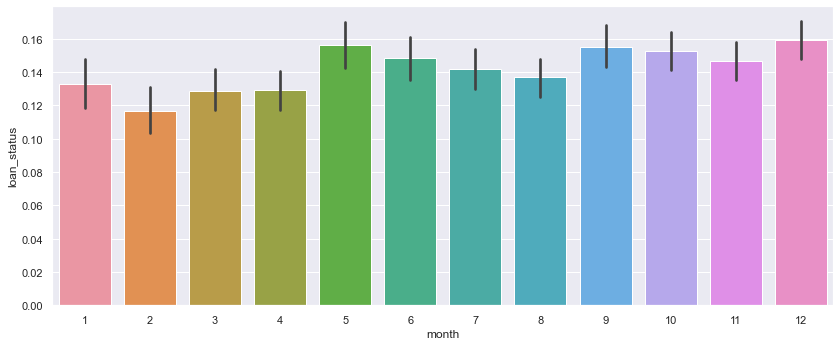

In [156]:
plt.figure(figsize=(14, 5.5))
sns.barplot(x='month',y='loan_status',data=loan)
plt.show()

### Binning Continuous features:

In [157]:
def bin_val_LMHV(n):
    if n < 5000:
        return 'Low'
    elif n >=5000 and n < 15000:
        return 'Medium'
    elif n >= 15000 and n < 25000:
        return 'High'
    else:
        return 'Very high'
    
    
def bin_val_int_rate(n):
    if n <= 10:
        return 'Low'
    elif n>10 and n<=15:
        return 'Medium'
    else:
        return 'High'   
    
    
def bin_val_dti(x):
    if x<=10:
        return 'Low'
    elif x>10 and x<=20:
        return 'Medium'
    else:
        return "High"

    
def bin_funded_amount(n):
    if n <= 5000:
        return 'Low'
    elif n > 5000 and n <=15000:
        return 'Medium'
    else:
        return 'High'
    

def installment(n):
    if n <= 200:
        return 'Low'
    elif n > 200 and n <=400:
        return 'Medium'
    elif n > 400 and n <=600:
        return 'High'
    else:
        return 'Very high'

    
def annual_income(n):
    if n <= 50000:
        return 'Low'
    elif n > 50000 and n <=100000:
        return 'Medium'
    elif n > 100000 and n <=150000:
        return 'High'
    else:
        return 'Very high'
    

def emp_length(n):
    if n <= 1:
        return 'Fresher'
    elif n > 1 and n <=3:
        return 'Junior'
    elif n > 3 and n <=7:
        return 'Senior'
    else:
        return 'SME'


In [158]:
#Binning function invocation point

loan['bin_loan_amnt'] = loan['loan_amnt'].apply(lambda x: bin_val_LMHV(x))
loan['bin_funded_amnt_inv'] = loan['funded_amnt_inv'].apply(lambda x: bin_val_LMHV(x))
loan['bin_int_rate'] = loan['int_rate'].apply(lambda x: bin_val_int_rate(x))
loan['bin_dti'] = loan['dti'].apply(lambda x: bin_val_dti(x))
loan['bin_funded_amnt'] = loan['funded_amnt'].apply(lambda x: bin_funded_amount(x))
loan['bin_installment'] = loan['installment'].apply(lambda x: installment(x))
loan['bin_annual_inc'] = loan['annual_inc'].apply(lambda x: annual_income(x))
loan['bin_emp_length1'] = loan['emp_length'].apply(lambda x: emp_length(x))

## Visualising Data Insights

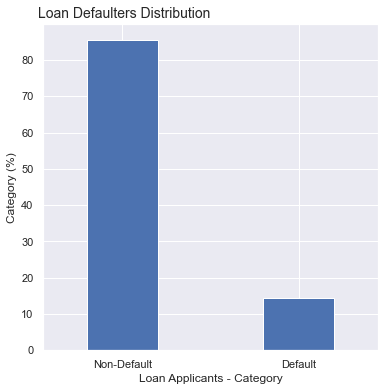

(37544, 37)

In [159]:
# check for amount of defaults in the data using countplot

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(6, 6))
g= round(loan['loan_status'].value_counts()/len(loan.index)*100,2).plot.bar(width=0.4)
label = ['Non-Default','Default']
g.set_xlabel("Loan Applicants - Category", fontsize=12)
g.set_ylabel("Category (%)", fontsize=12)
g.set_title("Loan Defaulters Distribution", fontsize=14, horizontalalignment='right')
ax.set_xticklabels(label, rotation=0, horizontalalignment='center')
plt.show()

loan.shape

### From above plot we can see that around 14% i.e. 5399 people are defaulters in total 37544 records.

## Univariate Analysis

In [160]:
# function for plotting the count plot features wrt default ratio

def plotUnivariateRatioBar(feature, data=loan, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status"]==1])
        feature_values.append(feature_count*100/feature_filter["loan_status"].count())
        
    plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    plt.show()

    
# function to plot univariate with default status scale 0 - 1
def plotUnivariateBar(x, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', data=loan)
    plt.title("Loan Defaults wrt "+str(x)+" feature - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

### a. Categorical Features

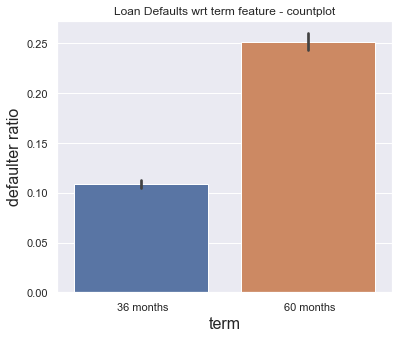

In [161]:
# check for defaulters wrt term in the data using countplot
plotUnivariateBar("term", figsize=(6,5))

### From above plot for ‘term’ we can infer that the defaulters rate is increasing wrt term, hence the chances of loan getting deaulted is less for 36m than 60m.
is term benificial -> Yes

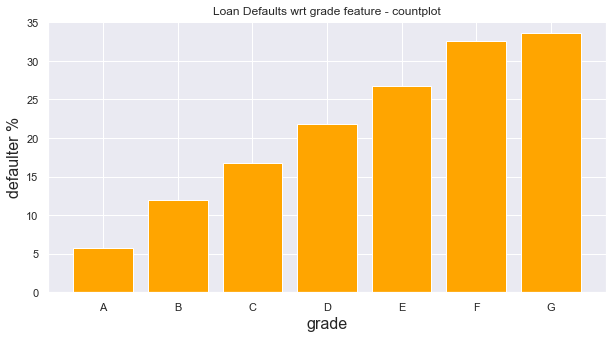

In [162]:
# check for defaulters wrt grade in the data using countplot
plotUnivariateRatioBar("grade")

### From above plot for ‘grade’ we can infer that the defaulters rate is increasing wrt grade, hence the chances of loan getting deaulted increases with the grade from A moving towards G.
is grade benificial -> Yes

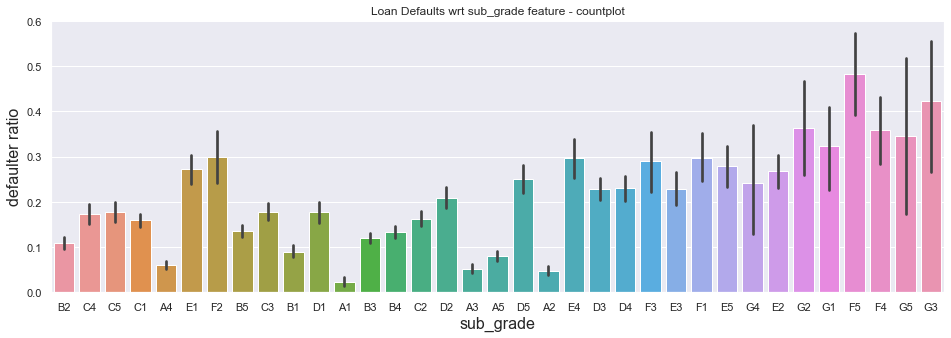

In [163]:
# check for defaulters wrt sub_grade in the data using countplot
plotUnivariateBar("sub_grade", figsize=(16,5))

### From above plot for ‘sub_grade’ we can infer that the defaulters rate is increasing wrt sub_grade, hence the chances of loan getting deaulted increases with the sub_grade from A1 moving towards G5.
is sub_grade benificial -> Yes

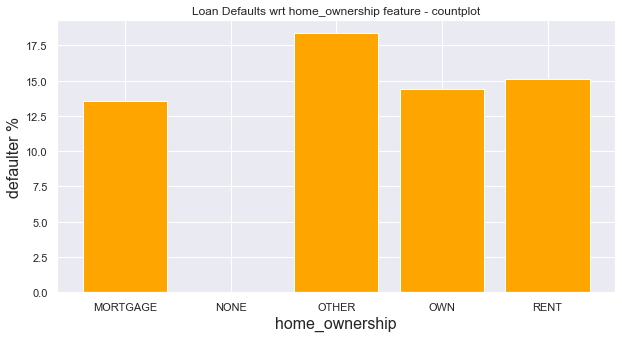

In [164]:
# check for defaulters wrt home_ownership in the data 
plotUnivariateRatioBar("home_ownership")

### From above plot for ‘home_ownership’ we can infer that the defaulters rate is constant here (it is quite more for OTHERS but we dont know what is in there, so we’ll not consider it for analysis), hence defaulter does not depends on home_ownership
is home_ownership benificial -> No

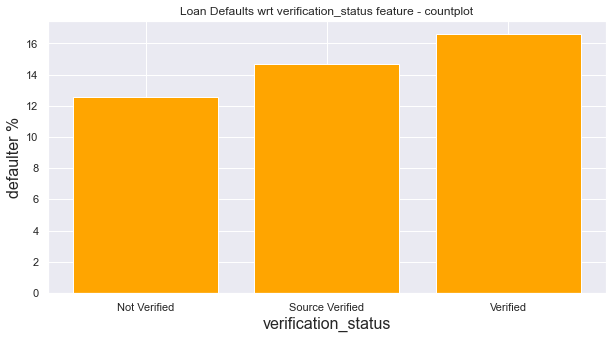

In [165]:
# check for defaulters wrt verification_status in the data
plotUnivariateRatioBar("verification_status")

### From above plot for ‘verification_status’ we can infer that the defaulters rate is increasing and is less for Not Verified users than Verified ones, but not useful for analysis.
is verification_status benificial -> No

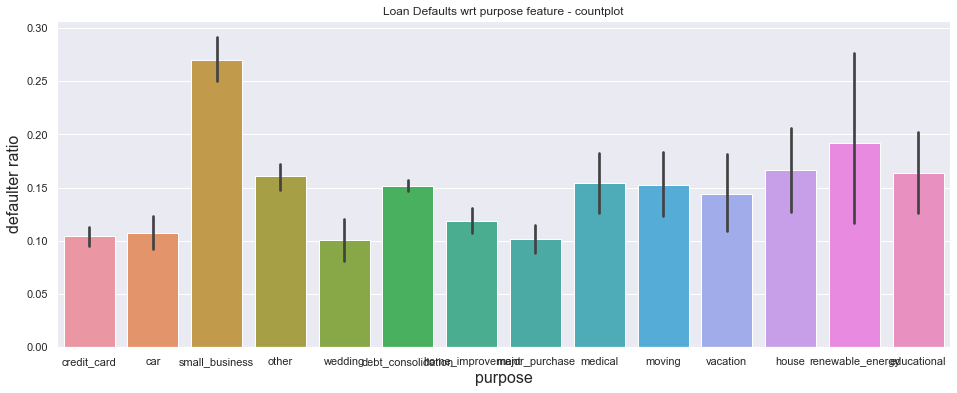

In [166]:
# check for defaulters wrt purpose in the data using countplot
plotUnivariateBar("purpose", figsize=(16,6))

### From above plot for ‘purpose’ we can infer that the defaulters rate is nearly constant for all purpose type except ‘small business’, hence rate will depend on purpose of the loan
is purpose benificial -> Yes

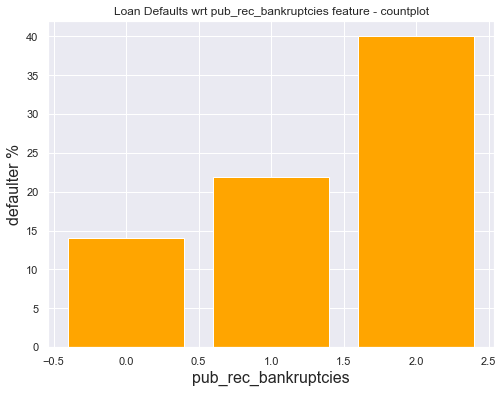

In [167]:
# check for defaulters wrt open_acc in the data using countplot
plotUnivariateRatioBar("pub_rec_bankruptcies", figsize=(8,6))


### From above plot for ‘pub_rec’ we can infer that the defaulters rate is nearly increasing as it is less for 0 and more for pub_rec with value 1, but as other values are very less as compared to 0 we’ll not consider this
is pub_rec benificial -> No

## b. Continuous Features

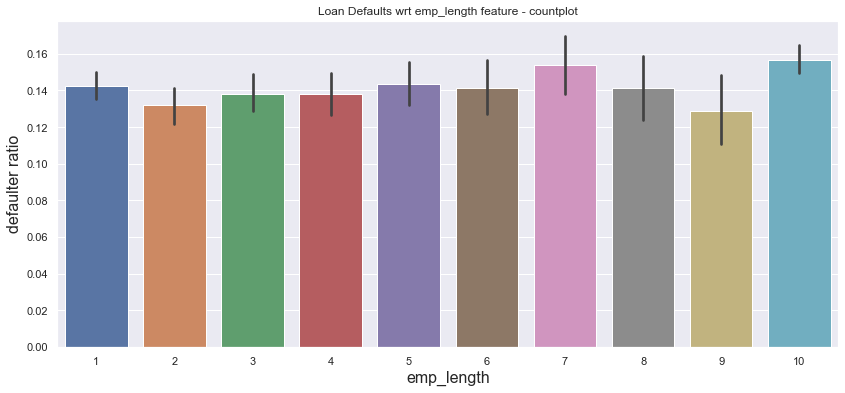

In [168]:
# check for defaulters wrt emp_length in the data using countplot
plotUnivariateBar("emp_length", figsize=(14,6))

### From above plot for ‘emp_length’ we can infer that the defaulters rate is constant here, hence defaulter does not depends on emp_length
is emp_length benificial -> No

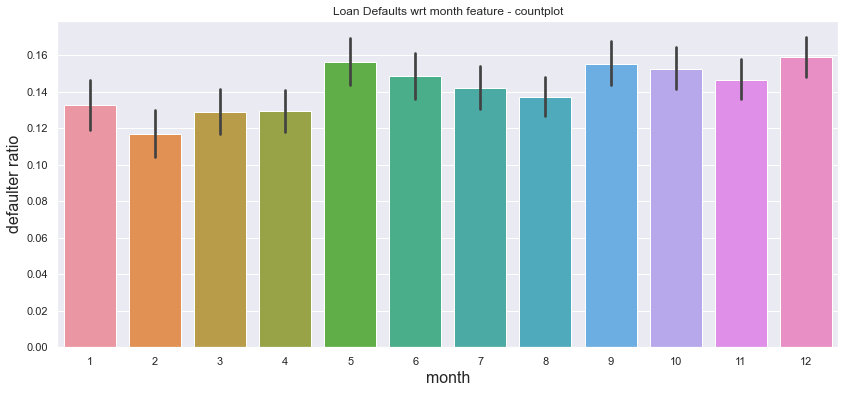

In [169]:
# check for defaulters wrt month in the data using countplot
plotUnivariateBar("month", figsize=(14,6))

### From above plot for ‘month’ we can infer that the defaulters rate is nearly constant here, not useful
is month benificial -> No

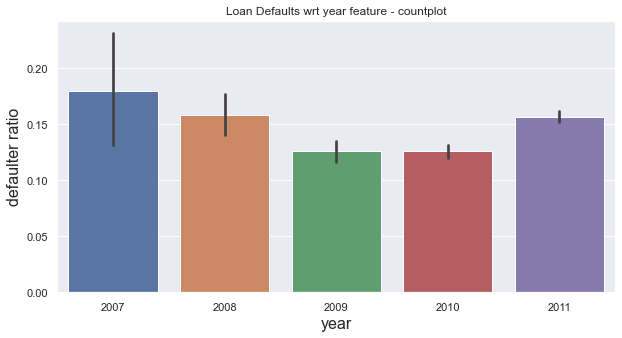

In [170]:
# check for defaulters wrt year in the data using countplot
plotUnivariateBar("year")

### From above plot for ‘year’ we can infer that the defaulters rate is nearly constant here, not useful
`is year benificial -> No`

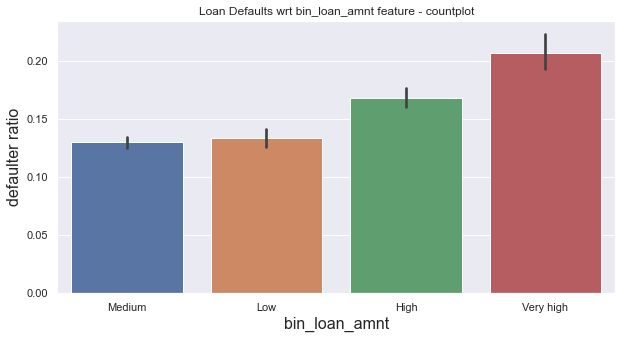

In [171]:
# check for defaulters wrt loan_amnt_range in the data using countplot
plotUnivariateBar("bin_loan_amnt")

### From above plot for ‘loan_amnt’ we can infer that the defaulters rate is increasing loan_amnt values, hence rate will depend on loan_amnt_range feature
`is loan_amnt_range benificial -> Yes`

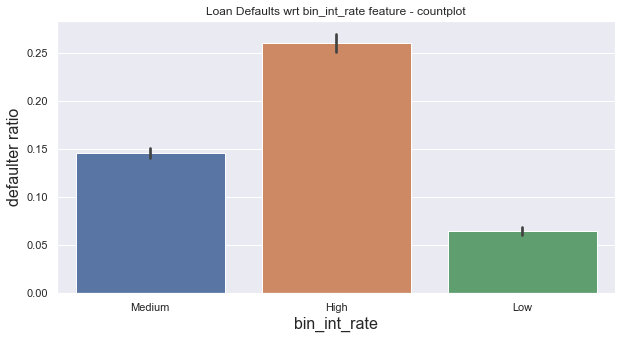

In [172]:
# check for defaulters wrt int_rate_range in the data
plotUnivariateBar("bin_int_rate")

### From above plot for ‘int_rate’ we can infer that the defaulters rate is increasing with int_rate values, hence rate will depend on int_rate_range feature
`is int_rate_range benificial -> Yes`

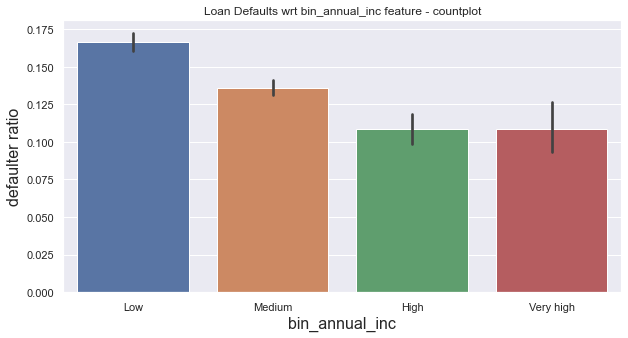

In [173]:
# check for defaulters wrt annual_inc_range in the data
plotUnivariateBar("bin_annual_inc")

### From above plot for ‘annual_inc’ , we can infer that the defaulters rate is decreasing as with annual_inc values, hence rate will depend on annual_inc_range feature
`is annual_inc_range benificial -> Yes`

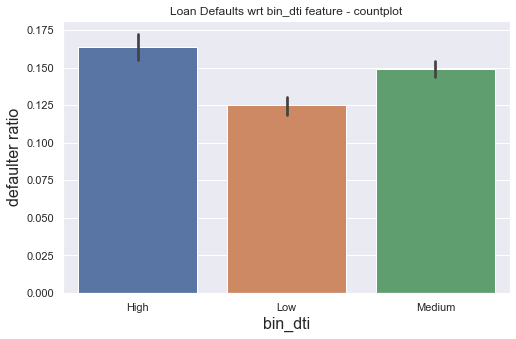

In [174]:
# check for defaulters wrt dti_range in the data using countplot
plotUnivariateBar("bin_dti", figsize=(8,5))

### From above plot for ‘dti_range’ we can infer that the defaulters rate is increasing as with dti_range values, hence rate will depend on dti_range feature
`is dti_range benificial -> Yes`

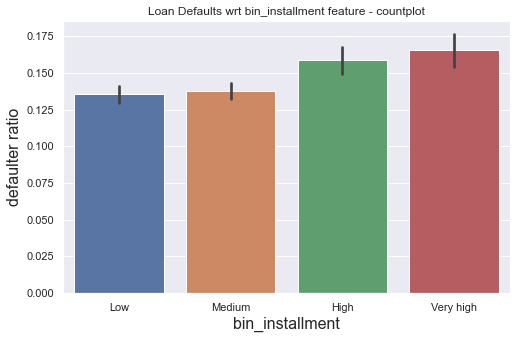

In [175]:
# check for defaulters wrt installment range in the data
plotUnivariateBar("bin_installment", figsize=(8,5))

### From above plot for ‘installment’ we can infer that the defaulters rate is increasing as with installment values, hence rate will depend on installment feature
`is installment benificial -> Yes`

### Therefore, following are the important features we deduced from above Univariate analysis:
term, grade, purpose,revol_util, loan_amnt, int_rate, annual_inc, dti, installment

## Bivariate Analysis

In [176]:
# function to plot scatter plot for two features
def plotScatter(x, y):
    plt.figure(figsize=(16,6))
    sns.scatterplot(x=x, y=y, hue="loan_status", data=loan)
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
def plotScatter_ana(x, y):
    plt.figure(figsize=(16,6))
    sns.scatterplot(x=x, y=y, hue="loan_status", data=ana_loan)
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()    
    
    
def plotBivariateBar(x, hue, figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', hue=hue, data=loan)
    plt.title("Loan Default ratio wrt "+x+" feature for hue "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

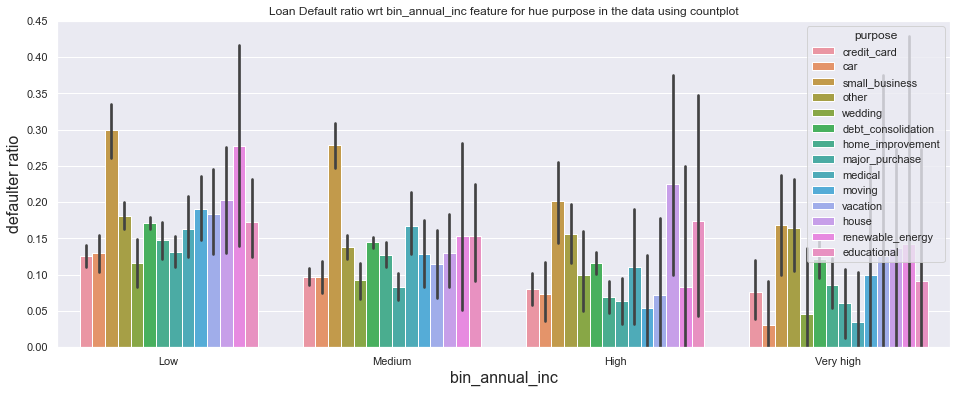

In [177]:
# check for defaulters wrt annual_inc and purpose in the data using countplot
plotBivariateBar("bin_annual_inc", "purpose")

### From above plot, we can infer it doesn’t shows any correlation
related - N

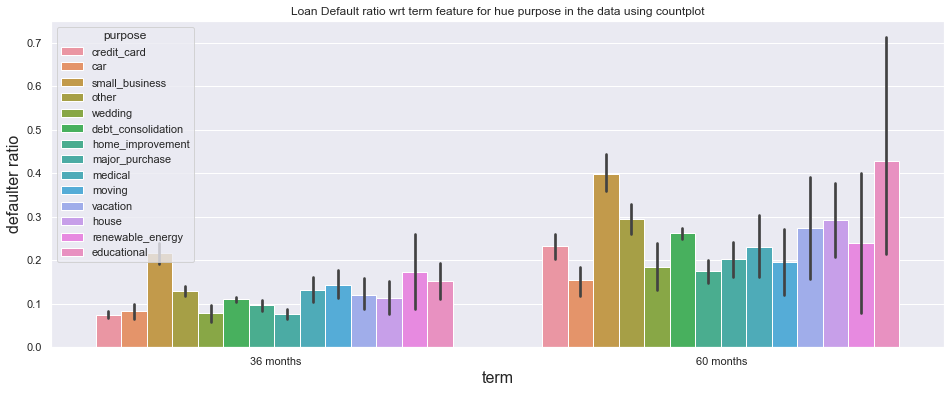

In [178]:
# check for defaulters wrt term and purpose in the data 
plotBivariateBar("term", "purpose")

### As we can see straight lines on the plot, default ratio increases for every purpose wrt term
related - Y

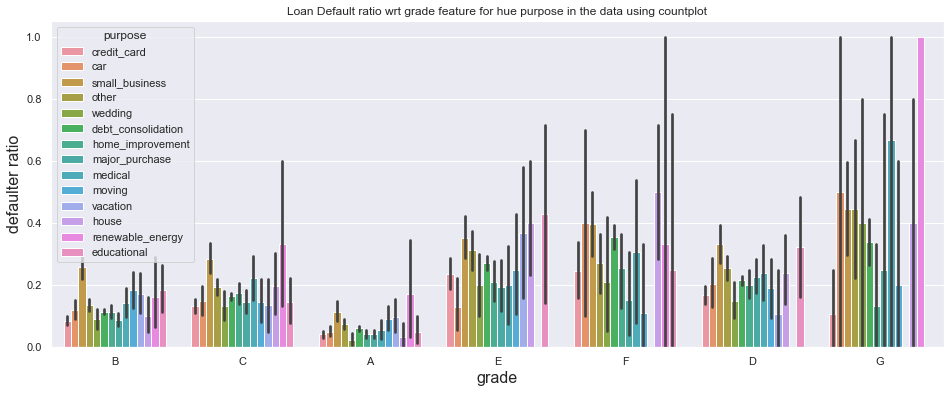

In [198]:
# check for defaulters wrt grade and purpose in the data 
plotBivariateBar("grade", "purpose")

### As we can see straight lines on the plot, default ratio increases for every purpose wrt grade
related - Y

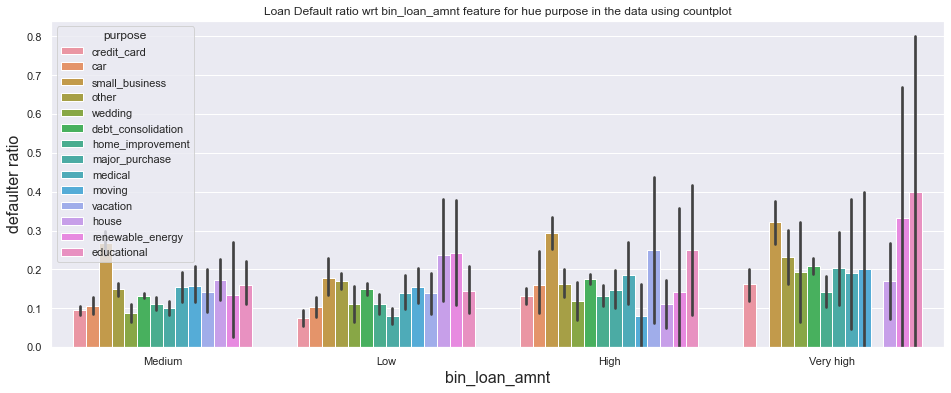

In [180]:
# check for defaulters wrt loan_amnt_range and purpose in the data
plotBivariateBar("bin_loan_amnt", "purpose")

### As we can see straight lines on the plot, default ratio increases for every purpose wrt loan_amnt_range
related - Y

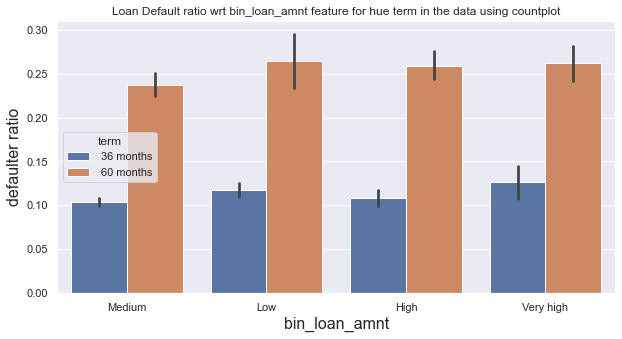

In [181]:
# check for defaulters wrt loan_amnt_range and term in the data
plotBivariateBar("bin_loan_amnt", "term",figsize=(10,5))

### As we can see straight lines on the plot, default ratio increases for every term wrt loan_amnt_range
related - Y

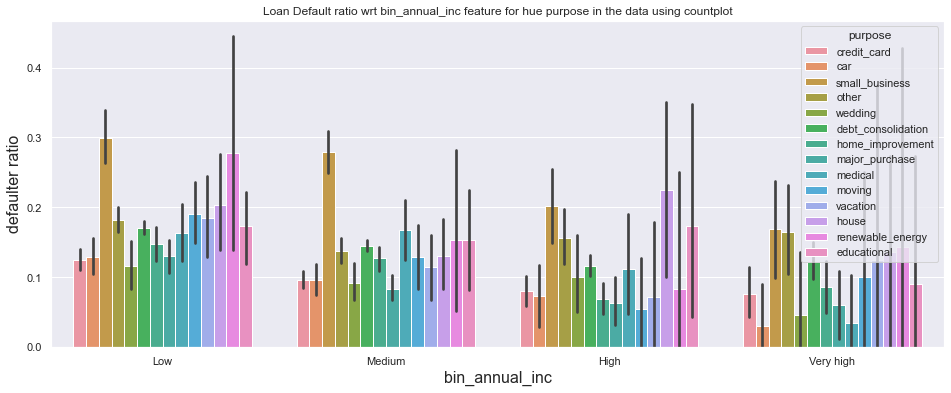

In [182]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("bin_annual_inc", "purpose")

### As we can see straight lines on the plot, default ratio increases for every purpose wrt annual_inc_range
related - Y

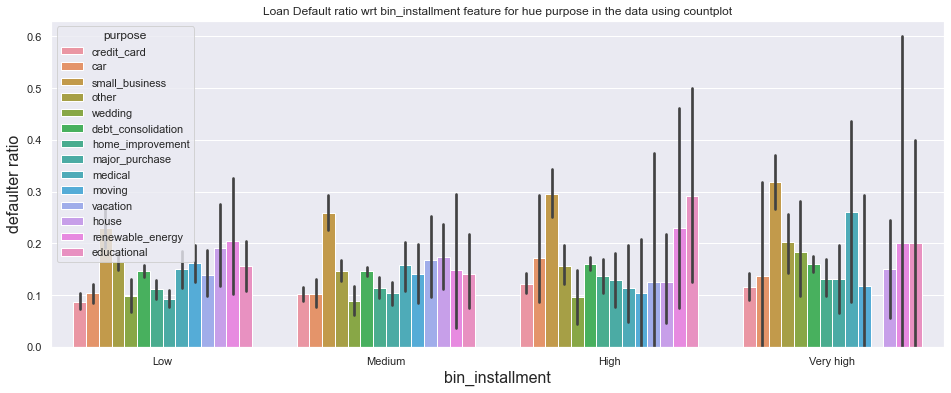

In [183]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("bin_installment", "purpose")

### As we can see straight lines on the plot, default ratio increases for every purpose wrt installment except for small_business
related - Y

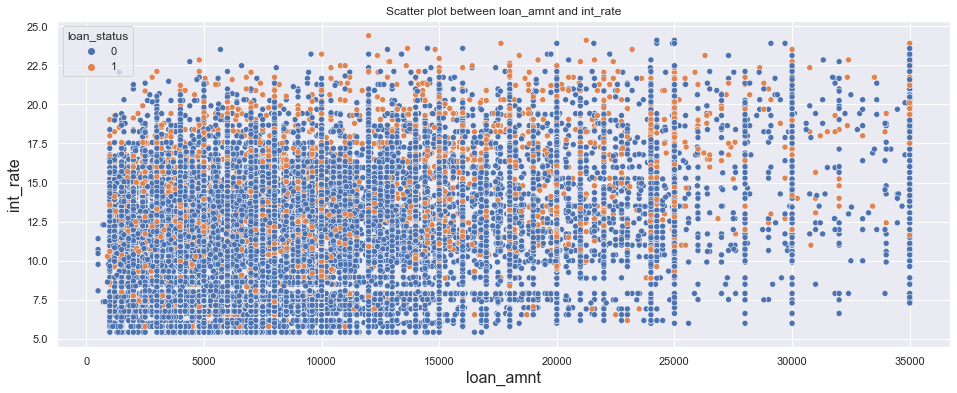

In [184]:
# check for defaulters wrt loan_amnt_range in the data
plotScatter_ana('loan_amnt', 'int_rate')

### As we can see straight lines on the plot, there is no relation between above mentioned features
related - N

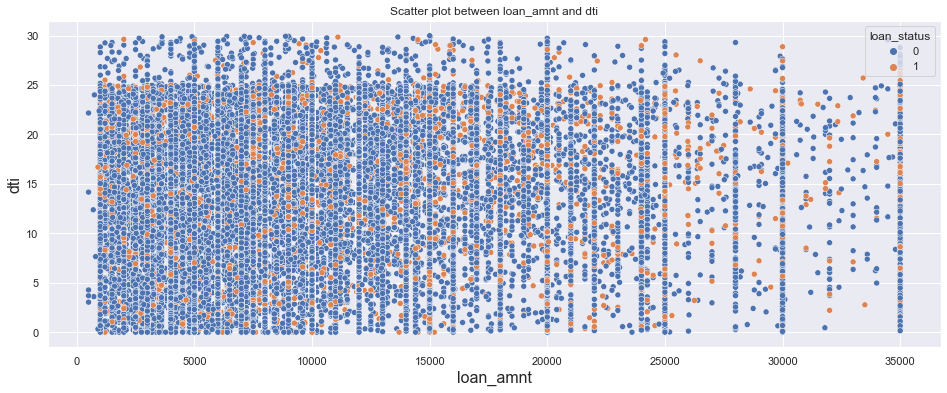

In [185]:
# plot scatter for funded_amnt_inv with dti
plotScatter_ana("loan_amnt", "dti")

### As we can see straight lines on the plot, there is no relation between above mentioned features
related - N

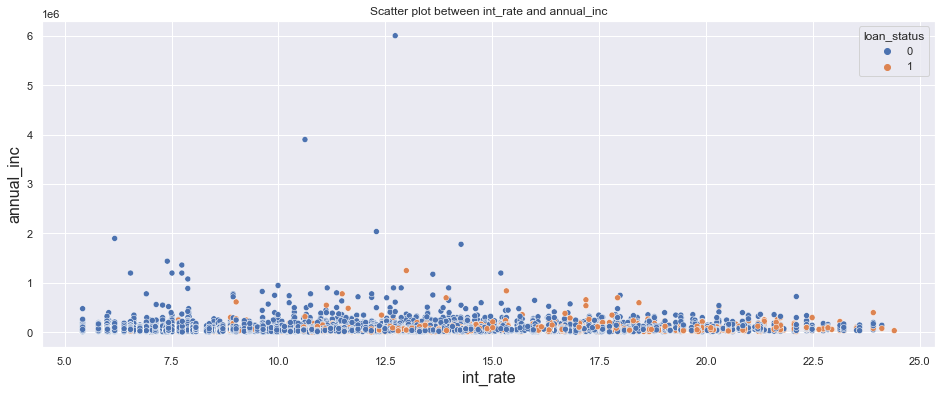

In [186]:
# plot scatter for int_rate with annual_inc
plotScatter_ana("int_rate", "annual_inc")

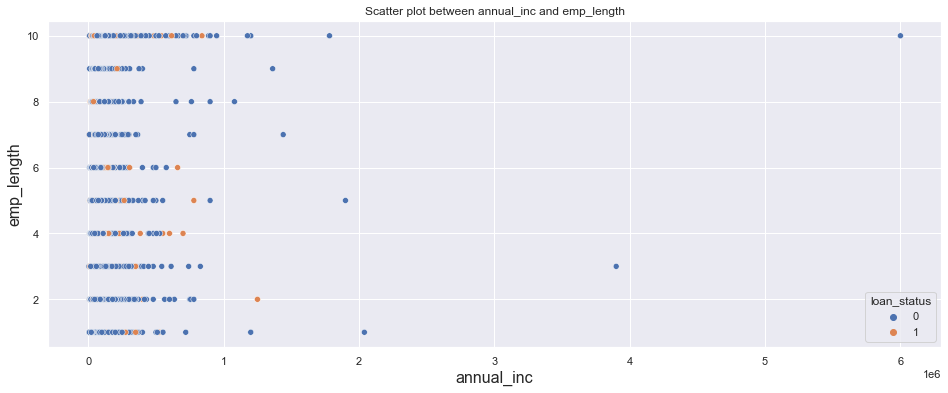

In [187]:
# plot scatter for annual_inc with emp_length
plotScatter_ana("annual_inc", "emp_length")

# Recommendation

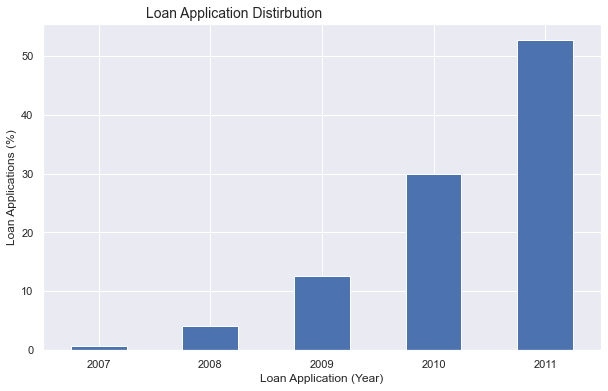

In [188]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))
g = round(ana_loan['year'].value_counts()/len(ana_loan.index)*100,2).sort_values(ascending=True).plot.bar()
g.set_xlabel("Loan Application (Year)", fontsize=12)
g.set_ylabel("Loan Applications (%)", fontsize=12)
g.set_title("Loan Application Distirbution", fontsize=14, horizontalalignment='right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.show()

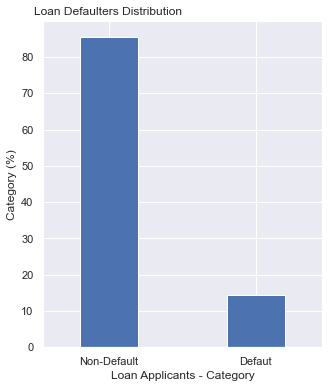

In [195]:
ana_loan['default_flag'] = ana_loan['loan_status'].apply(lambda x: 'Defaut' if x == 1 else 'Non-Default')

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(5, 6))
g= round(ana_loan['default_flag'].value_counts()/len(ana_loan.index)*100,2).plot.bar(width=0.4)
g.set_xlabel("Loan Applicants - Category", fontsize=12)
g.set_ylabel("Category (%)", fontsize=12)
g.set_title("Loan Defaulters Distribution", fontsize=12, horizontalalignment='right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.show()

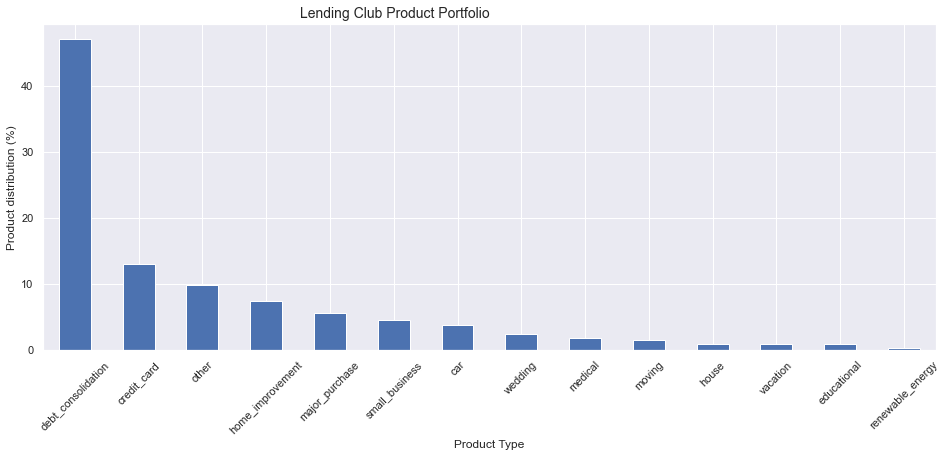

In [190]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(16, 6))
g= round(ana_loan['purpose'].value_counts()/len(ana_loan.index)*100,2).plot.bar()
g.set_xlabel("Product Type", fontsize=12)
g.set_ylabel("Product distribution (%)", fontsize=12)
g.set_title("Lending Club Product Portfolio", fontsize=14, horizontalalignment='right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
plt.show()

<Figure size 1440x576 with 0 Axes>

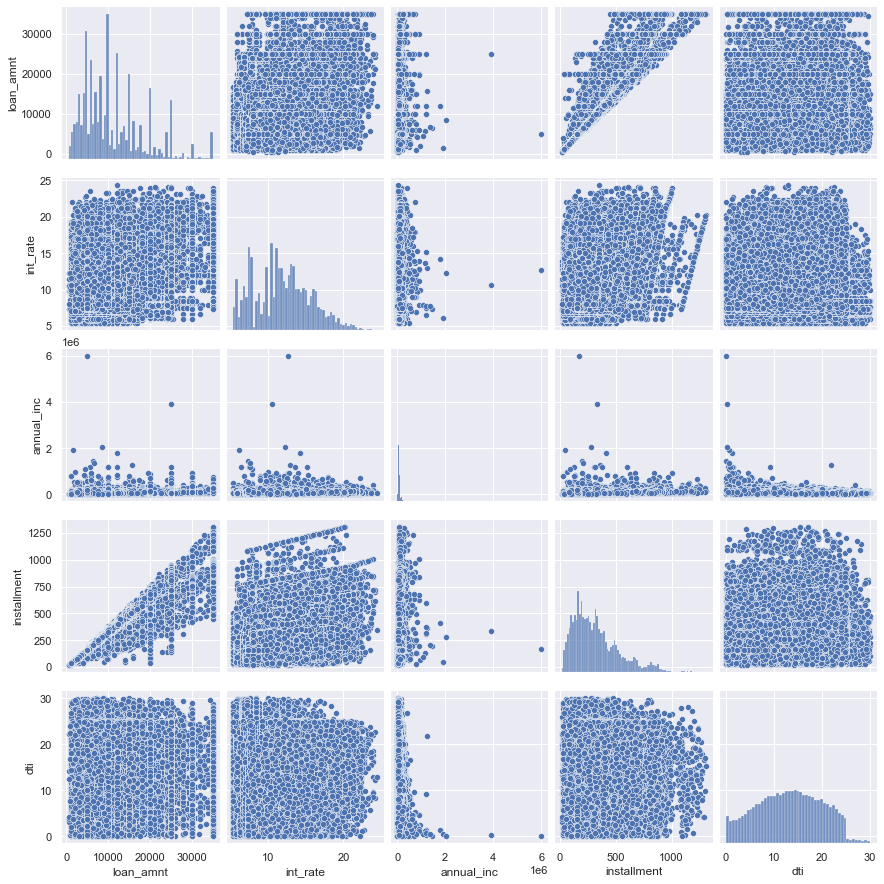

In [191]:
plt.figure(figsize=(20,8))
sns.pairplot(ana_loan[['loan_amnt','int_rate','annual_inc','installment','dti']])
plt.show()

## Multivariate Analysis (Correlation)

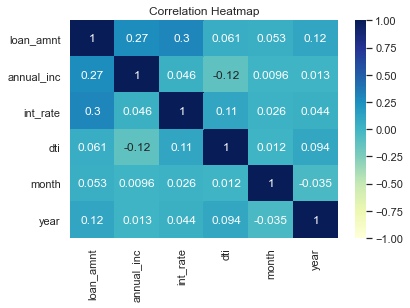

In [192]:
# plot heat map to see correlation between features
continuous_f = ["loan_amnt", "annual_inc","int_rate","dti","month","year"]
loan_corr = ana_loan[continuous_f].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

### Hence, important related feature from above Multivariate analysis are:
term, grade, purpose, revol_util, int_rate, installment, annual_inc, loan_amnt


## Final Findings
After analysing all the related features available in the dataset, we have come to an end, deducing the main driving features for the Lending Club Loan Default analysis:
The best driving features for the Loan default analysis are: term, grade, purpose, revol_util, int_rate, installment, annual_inc, funded_amnt_inv